#Insurance Claims Charges Prediction

Download dataset

In [1]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2024-01-05 15:04:49--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.002s  

2024-01-05 15:04:49 (31.2 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [2]:
#import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the Data

data= pd.read_csv('insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##STEP-2:Exploratory Data Analysis (EDA)

In [5]:
# Descriptive stats

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Null check

data.isnull().values.any()

False

Visulizations

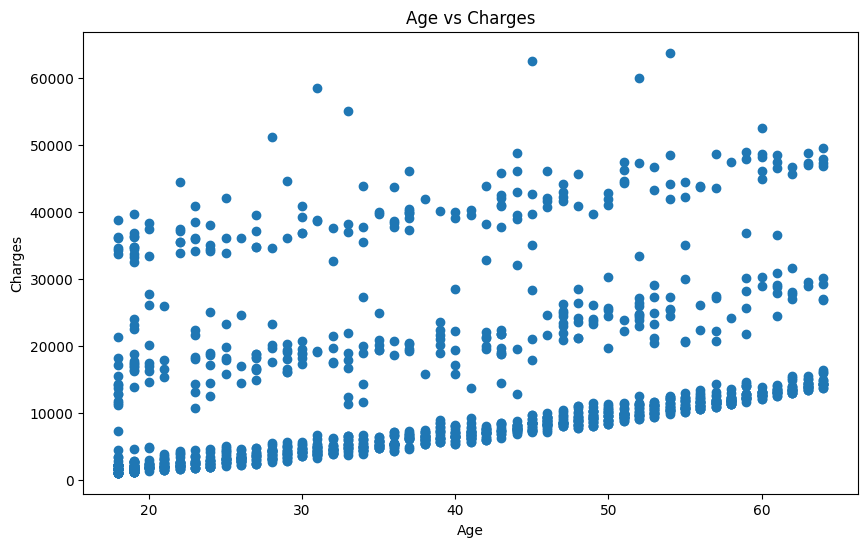

In [7]:
# Age vs Charges
# the more the age the more will be insurance charge

plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['charges'])
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

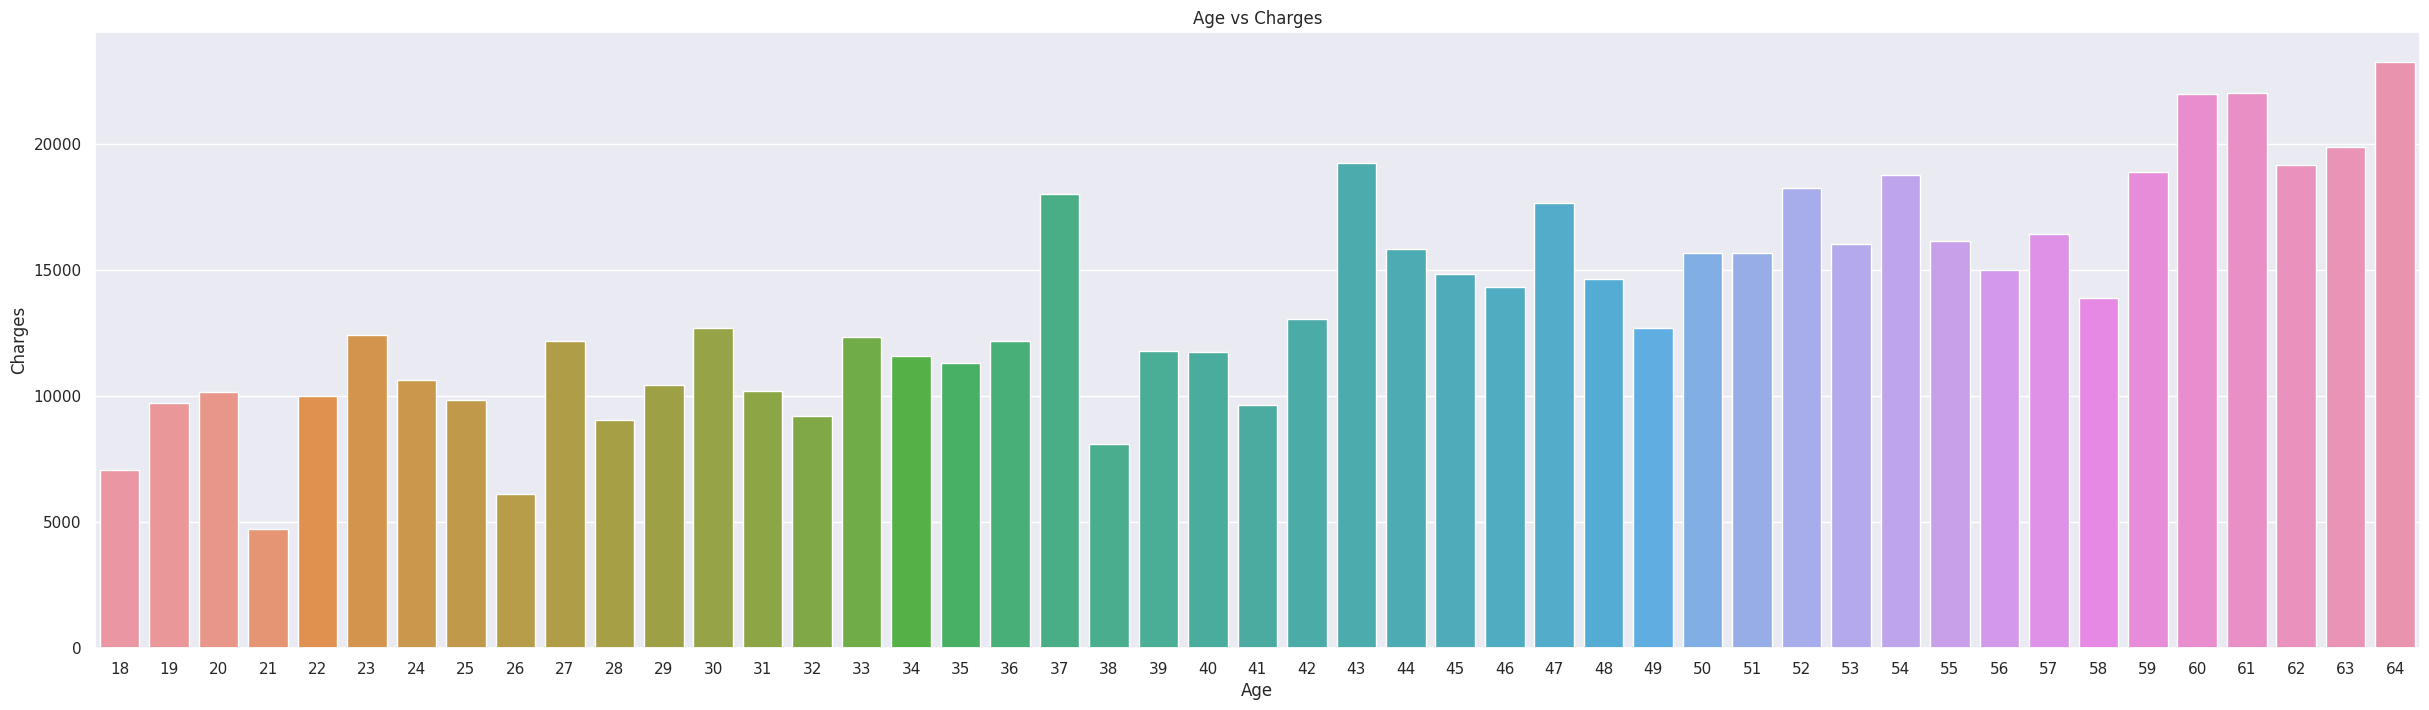

In [28]:
avg_charges= (data.groupby('age')['charges'].mean()).tolist()
grouped_age=sorted(data['age'].unique())
df= pd.DataFrame({'Age':grouped_age,'Charges':avg_charges})
sns.barplot(df,x='Age',y='Charges').set(title='Age vs Charges')
sns.set(rc = {'figure.figsize':(30,8)})

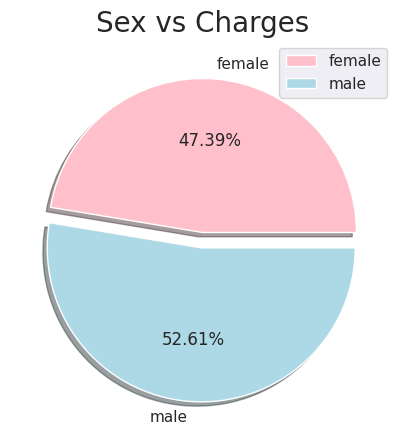

In [9]:
# sex vs charges
# males insurance charges more than females.

labels = data['sex'].unique().tolist()
size = data.groupby('sex')['charges'].mean().tolist()
colors = ['pink', 'lightblue']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Sex vs Charges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


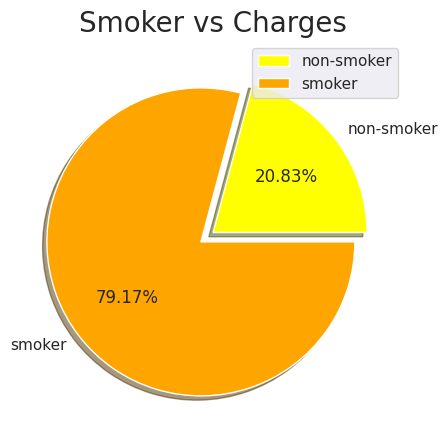

In [10]:
# smoker vs charges
# smokers have more insurance charges than the non smokers

c=data.groupby('smoker')['charges'].mean()
labels = ['non-smoker', 'smoker']
size = data.groupby('smoker')['charges'].mean()
colors = ['yellow', 'orange']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Smoker vs Charges', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

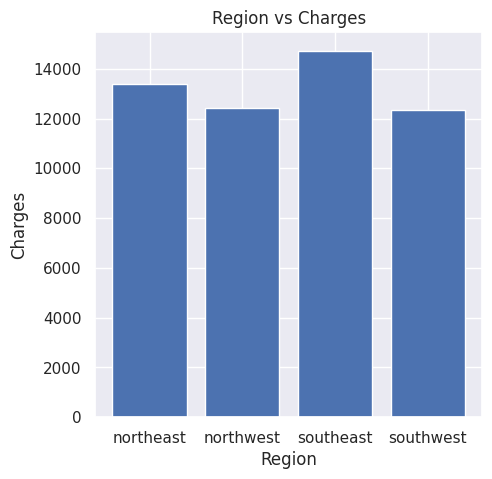

In [11]:
# region vs charges
# region actually does not play any role in determining the insurance charges

regions=sorted(data['region'].unique())
avg_charges_by_region=data.groupby('region')['charges'].mean()
#plt.figure(figsize=(10, 6))
plt.bar(regions,avg_charges_by_region)
plt.title('Region vs Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

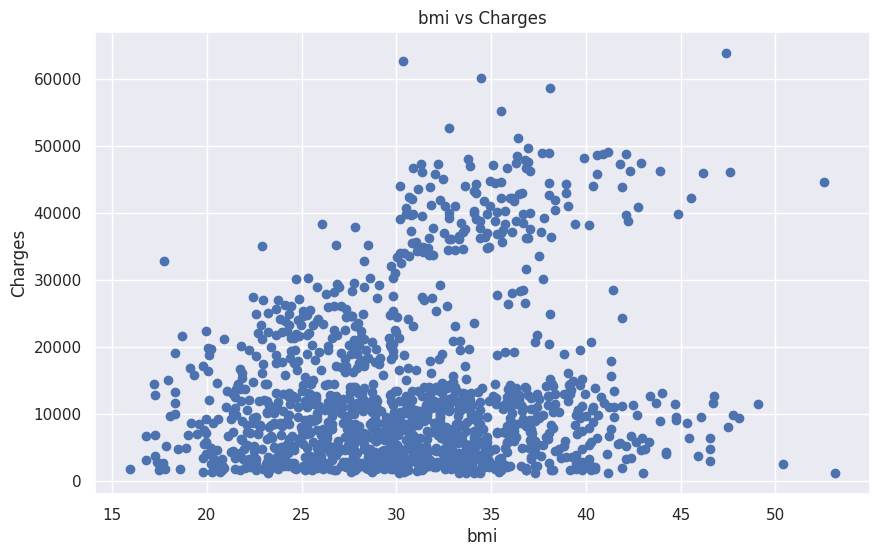

In [12]:
#bmi vs charges

plt.figure(figsize=(10, 6))
plt.scatter(data['bmi'], data['charges'])
plt.title('bmi vs Charges')
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.show()

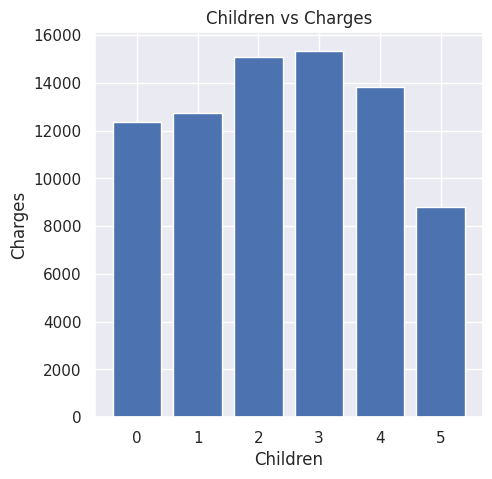

In [13]:
#children vs charges
unique_children=sorted(data['children'].unique())
avg_charges_by_children=data.groupby('children')['charges'].mean()
plt.bar(unique_children,avg_charges_by_children)
plt.title('Children vs Charges')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

<ipython-input-32-e85fb8feb70e>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<Axes: >

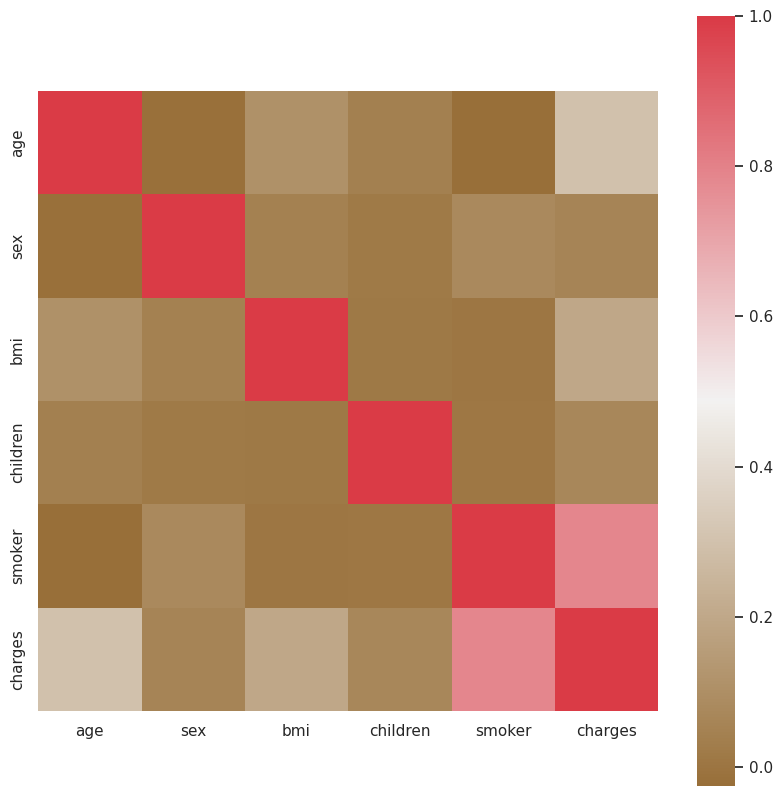

In [32]:
# plotting the correlation plot for the dataset
f, ax = plt.subplots(figsize = (10, 10))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

##STEP-3:Data Preprocessing / Clean the Data


In [15]:
# removing unnecassary columns from the dataset
data = data.drop(['region'], axis=1)

In [16]:
# Label Encoding for sex and smoker

from sklearn.preprocessing import LabelEncoder
data['sex']= LabelEncoder().fit_transform(data['sex'])
data['smoker']= LabelEncoder().fit_transform(data['smoker'])
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [33]:
#Selecting Independent (Features) & Dependent(Target) variables
x = data.drop(['charges'], axis=1)
y = data['charges']

Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [40]:
# creating the model
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()

# feeding the training data to the model
mlr.fit(x_train, y_train)

# predicting the test set results
y_pred = mlr.predict(x_test)
#print("Prediction for test set: {}".format(y_pred))

# calculating the mean squared error
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
# Calculating the root mean squared error
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Calculating the r2 score
lr_r2score = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', meanAbErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('R2 score:', lr_r2score)

Mean Absolute Error: 3939.7808069668304
Root Mean Square Error: 5671.492452926755
R2 score: 0.7978644236809904


##Support Vector Machine

In [41]:
# creating the model

from sklearn.svm import SVR

regressor = SVR(kernel='linear')


# feeding the training data to the model

regressor.fit(x_train,y_train)

# # predicting the test set results
y_pred = regressor.predict(x_test)

# calculating the mean squared error
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
# Calculating the root mean squared error
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Calculating the r2 score
svm_r2score = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', meanAbErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('R2 score:', svm_r2score)


Mean Absolute Error: 6673.73677340418
Root Mean Square Error: 13152.69089323304
R2 score: -0.08711945386341724


##Decision Tree

In [42]:
# creating the model
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
# feeding the training data to the model
model.fit(x_train, y_train)
# predicting the test set results
y_pred = model.predict(x_test)
# calculating the mean squared error
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
# Calculating the root mean squared error
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Calculating the r2 score
dt_r2score = metrics.r2_score(y_test, y_pred)

print('Mean Absolute Error:', meanAbErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('R2 score:', dt_r2score)

Mean Absolute Error: 3093.661240481343
Root Mean Square Error: 6623.984363461556
R2 score: 0.724268338865292


##Random Forest

In [43]:
# creating the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, max_depth = 4, n_jobs = -1)
# feeding the training data to the model
model.fit(x_train, y_train)
# predicting the test set results
y_pred = model.predict(x_test)
# calculating the mean squared error
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
# Calculating the root mean squared error
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Calculating the r2 score
rf_r2score = metrics.r2_score(y_test, y_pred)


print('Mean Absolute Error:', meanAbErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('R2 score:', rf_r2score)

Mean Absolute Error: 2418.5086502837016
Root Mean Square Error: 4088.3544496924465
R2 score: 0.8949623197139662


Compare and evaluate the Model results and find the best model

In [46]:
result = pd.DataFrame({'Model':('Linear Regression', 'SVM', 'Decision Tree', 'Random Forest'),
                       'R2 Score': (lr_r2score, svm_r2score, dt_r2score, rf_r2score)})
display(result)

,Model,R2 Score
0,Linear Regression,0.797864
1,SVM,-0.087119
2,Decision Tree,0.724268
3,Random Forest,0.894962


**From the result, *Random Forest* is the best model as it has the highest R2 score at 0.89**